# Multiple Regression
### Multiple features to predict target variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [5]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.shape

(506, 13)

In [9]:
X = df

In [10]:
y = boston_data.target

***

## Statsmodels

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Need to add a constant term to allow statsmodel.api to calculate the bias / intercepts

In [12]:
X_constant = sm.add_constant(X)

In [14]:
pd.DataFrame(X_constant).head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
model = sm.OLS(y, X_constant)

In [17]:
lr = model.fit()

In [18]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 05 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        16:34:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### statsmodels.formula.api

In [20]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
                 data=df)
mlr = form_lr.fit()

In [21]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 05 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        17:05:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Now all variables up to number of rooms
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM',
                 data=df)
mlr = form_lr.fit()

In [23]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     118.4
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           1.32e-92
Time:                        09:56:42   Log-Likelihood:                -1616.3
No. Observations:                 506   AIC:                             3247.
Df Residuals:                     499   BIC:                             3276.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.9546      3.214     -5.587      0.000     -24.269     -11.640
CRIM          -0.1769      0.035     -5.114      0.000      -0.245      -0.109
ZN             0.0213      0.014      1.537      0.125      -0.006       0.048
INDUS         -0.1437      0.064     -2.247      0.025      -0.269      -0.018
CHAS           4.7847      1.059      4.518      0.000       2.704       6.866
NOX           -7.1849      3.694     -1.945      0.052     -14.442       0.072
RM             7.3416      0.417     17.597      0.000       6.522       8.161
==============================================================================
Omnibus:                      218.887   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.877
Skew:                           1.738   Prob(JB):                         0.00
Kurtosis:                      10.786   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

## Multicollinearity

### Correlation Matrix
Useful diagnostic tool to identify multicolinearity

In [24]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440


In [25]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6255,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6255,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000


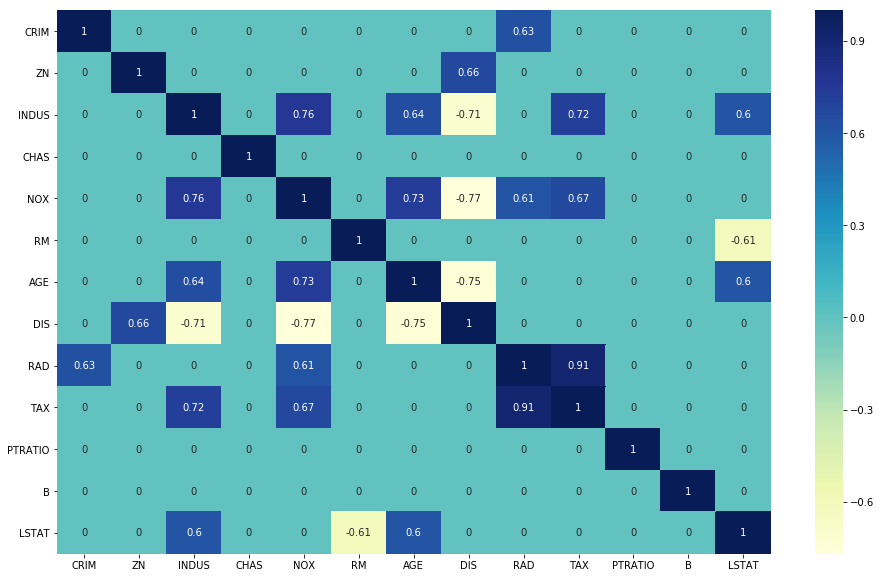

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

### Detecting Collinearity with Eigenvectors

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [29]:
pd.Series(eigenvalues).sort_values()

8    0.0635
10   0.1693
11   0.1860
12   0.2202
9    0.2769
7    0.3961
6    0.5354
5    0.6574
4    0.8348
3    0.8576
2    1.2426
1    1.4333
0    6.1268
dtype: float64

Note that eigenvalue 8 is very small. Eigen values near 0 or that are very small compared to the others. This represents the presence of collinearity.

In [30]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.7202
8    0.6335
2    0.2511
1    0.0809
0    0.0460
5    0.0456
4    0.0436
6    0.0386
3    0.0359
12   0.0244
10   0.0234
7    0.0183
11   0.0045
dtype: float64

Eigenvectors with index 9, 8, and 2 have very high loadings when compared to the rest.

In [34]:
print(df.columns[[2,8,9]])

Index(['INDUS', 'RAD', 'TAX'], dtype='object')


These are the factors that are causing multicollinearity problems.
***

## Revisiting Feature Importance and Extractions

Check:
    1. Direction of coefficient
    2. Impact of the variable/factor on the model

### Standardize Variable to Identify Key Feature(s)
In order to do step 2 from above, need to have standardized variables

In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


Can see that features are on different scales. Need to standardize.

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


Can see the difference in coefficients. 
Now scale them and do the same.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
standard_coef_linear_reg = make_pipeline(scaler, model)

In [44]:
standard_coef_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(standard_coef_linear_reg.steps[1][1].coef_, df.columns)),
                     columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


Now with standard coefficients, we can see that LSTAT is most significant and AGE is least.

### Use $R^{2}$ to Identify Key Features
-  Compare $R^{2}$ of medel against $R^{2}$ of model without a feature.
-  A significant change in $R^{2}$ signify the importance of the feature.

In [45]:
from sklearn.metrics import r2_score

Benchmark model with all features

In [46]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
                 data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.7406426641094094

Without LSTAT

In [49]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B',
                 data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y, lr_without_LSTAT.predict(df))

0.6842042799773889

Without AGE

In [50]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT',
                 data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y, lr_without_AGE.predict(df))

0.7406412165505145

***

## Gradient Descent
### Background
$h(x) = \theta_0 + \theta_1X$

Fine values of $\theta_0$ and $\theta_1$ which provide the best fit for the hypothesis to a training set. 
<br>
The training set examples are labeled $x, y$.
<br>
$x$ is the input value and $y$ is the output.
<br>
the $i^{th}$ training example is labeled $x^{(i)}, y^{(i)}$.
<br>
<br>
<br>
### MSE Cost Function
The cost function $J$ for a particular choise of parameters $\theta$ is the mean squared error (MSE):
$$J(\theta)= \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2 $$
<br>
$m$ The number of training examples
<br>
$x^{(i)}$ The input vector for the $i^{th}$ training example
<br>
$y^{(i)}$ The class label for the $i^{th}$ training example
<br>
$\theta$ The chosen parameter values of "weights" ($\theta_0, \theta_1, \theta_2$)
<br>
$h_\theta(x^{(i)})$ The alogrithm's prediction for the $i^{th}$ training exmple using parameter $\theta$
<br>
The MSE measures the mean amount that the model's predictions deciate from the correct values.
<br>
It is a measure of the model's performance on the training set.
<br>
The cost is higher when the model is performing poorly on the training set,
<br>
The objective of the learning algorithm is to find the parameters $\theta$ which give the minimum possible cost $J$.
<br>
<br>
The minimization objective is expressed using the following notation, which simply states that we want to find the $\theta$ which miniminzed the cost $J(\theta)$.
<br>
$$\min_{\theta}J(\theta)$$

### Example 1
### Gradient Descent Minimization
Assume the cost function is:
$$J(\theta)=\theta^2$$
And we want to find the value of $\theta$ which minimuzed $J(\theta)$
<br>
Assume further we sstart with $\theta=3$
<br>
<br>
Gradient descent is an iterative algorithm which we will run many times.
<br>
On each iteration, we apply the follow "update rule" (the := symbol means replace $\theta$ with the value computed on the right):
$$\theta:= \theta-\alpha\frac{d}{d\theta}J(\theta)$$
Alpha is the learning rate.
<br>
Assume $\alpha=0.1$ for now.
$$\frac{d}{d\theta}J(\theta)=2\theta$$

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [61]:
theta = 3
alpha = 0.1
dat = []
for oo in range(0,10):
    res = alpha * 2 * theta #update rule
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 2])
    theta = theta - res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [62]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.0000,9.0000
1,2.4000,5.7600
2,1.9200,3.6864
3,1.5360,2.3593
4,1.2288,1.5099
5,0.9830,0.9664
6,0.7864,0.6185
7,0.6291,0.3958
8,0.5033,0.2533
9,0.4027,0.1621


Text(0, 0.5, 'J(Theta)')

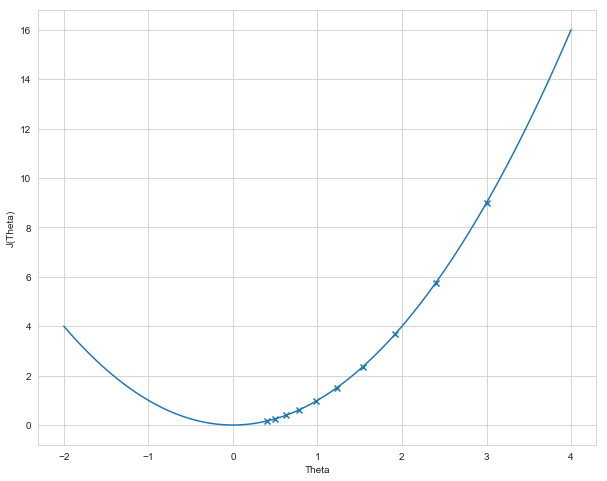

In [66]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2, 4, 100),np.linspace(-2, 4, 100) ** 2);
plt.scatter(tmp.iloc[: ,0], tmp.iloc[: ,1], marker='x');
plt.xlabel('Theta');
plt.ylabel('J(Theta)');

### Example 2
<br>
$$J(\theta)=\theta^4+\theta^2$$
$$\frac{d}{d\theta}J(\theta)=4\theta^3+2\theta$$
$$\theta:=\alpha(4\theta^3+2\theta)$$

In [67]:
theta = 3
alpha = 0.01
dat = []
for oo in range(0,10):
    res = alpha * (4 * np.power(theta, 3) + 2 * theta)
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 4 + theta ** 2])
    theta = theta - res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [68]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.0000,90.0000
1,1.8600,15.4284
2,1.5654,8.4554
3,1.3807,5.5399
4,1.2478,3.9810
5,1.1451,3.0307
6,1.0621,2.4009
7,0.9930,1.9582
8,0.9339,1.6331
9,0.8827,1.3862


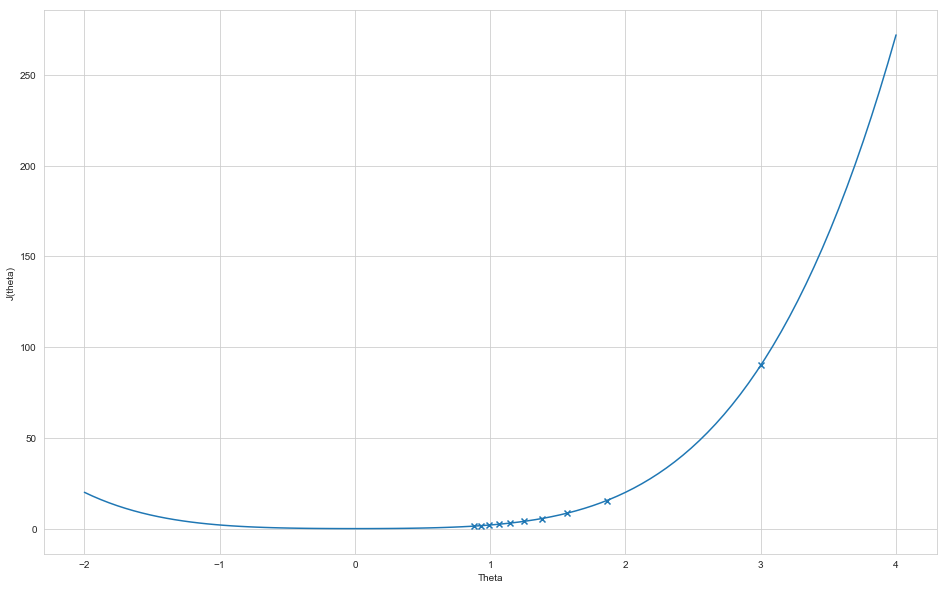

In [71]:
plt.figure(figsize=(16,10))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100) ** 4 + np.linspace(-2, 4, 100) ** 2);
plt.scatter(tmp.iloc[:, 0], tmp.iloc[:, 1], marker='x');
plt.xlabel('Theta');
plt.ylabel('J(theta)');

***
## Applying Gradient Descent to Boston Housing Data

In [72]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [74]:
X = df[['LSTAT']].values
y = boston_data.target

In [75]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

In [83]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

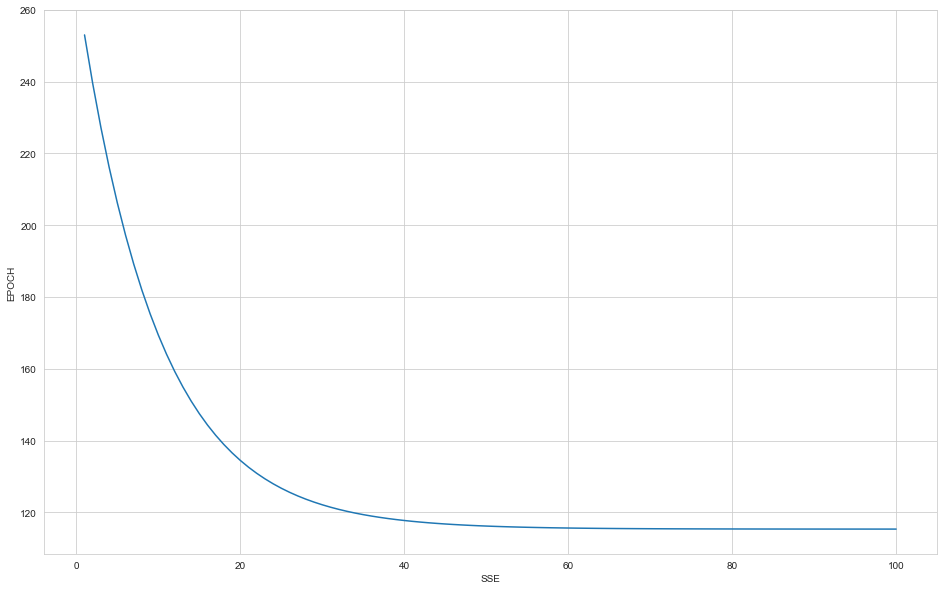

In [86]:
plt.figure(figsize=(16,10))
plt.plot(range(1, n_ + 1), cost_);
plt.xlabel('SSE');
plt.ylabel('EPOCH');

In [87]:
w_

array([-7.57793828e-16, -7.33562757e-01])

In [119]:
#Perform Process on RM
X = df[['RM']].values
y = boston_data.target
X.shape, y.shape

((506, 1), (506,))

In [120]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

In [130]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * error.sum()
    
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

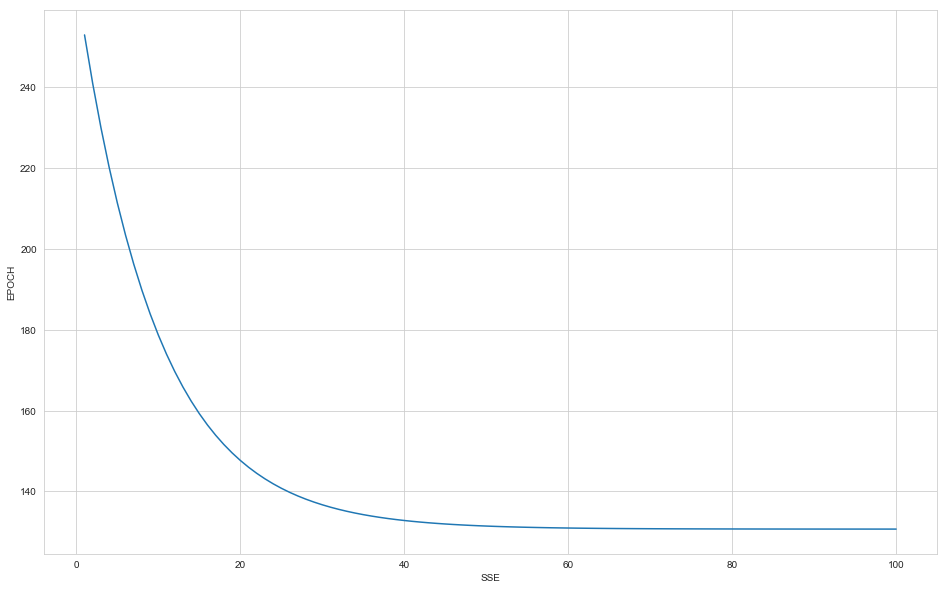

In [131]:
plt.figure(figsize=(16,10))
plt.plot(range(1, n_ + 1), cost_);
plt.xlabel('SSE');
plt.ylabel('EPOCH');

In [132]:
#Changing the learning rate, 0.00001:
alpha = 0.00001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * error.sum()
    
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

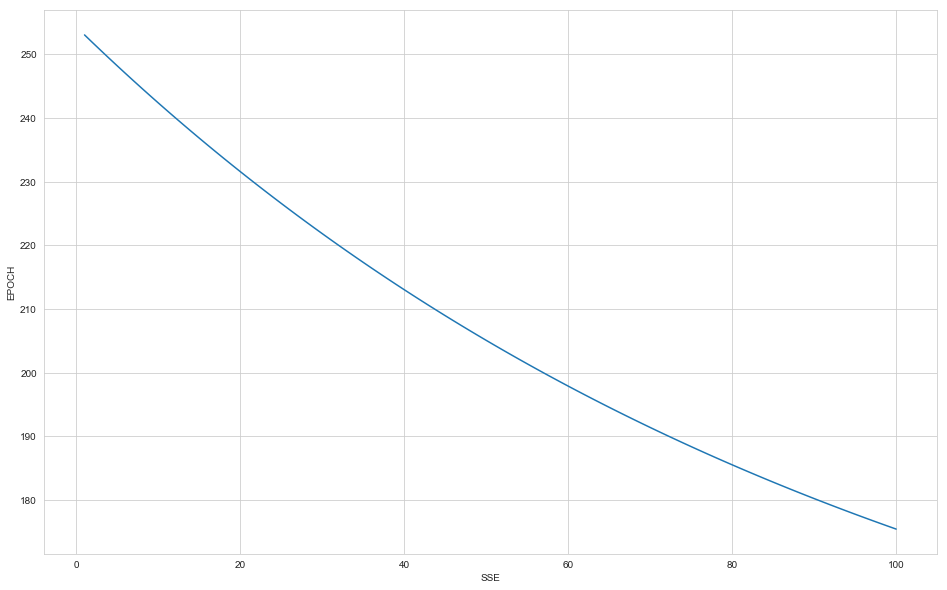

In [134]:
plt.figure(figsize=(16,10))
plt.plot(range(1, n_ + 1), cost_);
plt.xlabel('SSE');
plt.ylabel('EPOCH');

#Still works

In [146]:
#Changing the learning rate, 0.01:
alpha = 0.01
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * error.sum()
    
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

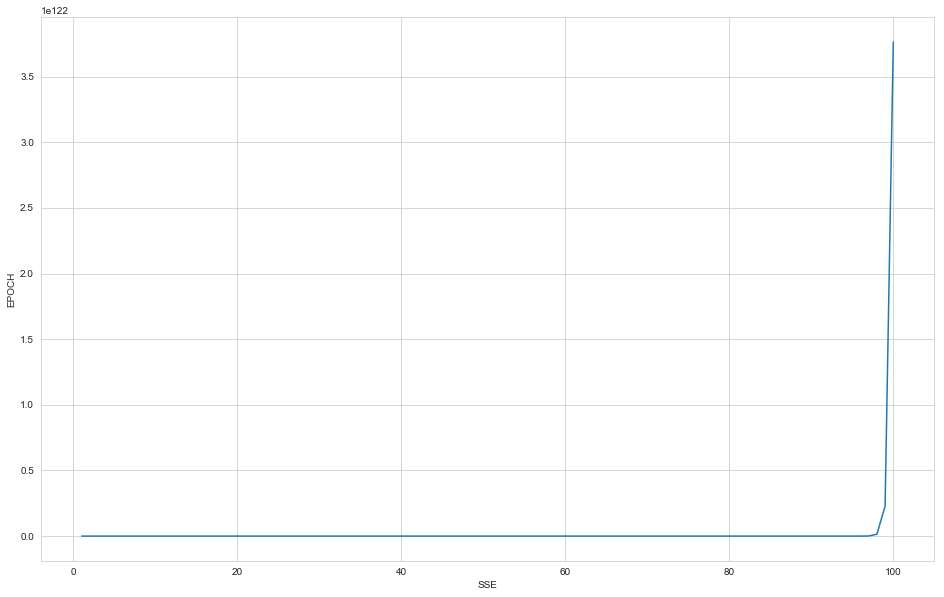

In [147]:
plt.figure(figsize=(16,10))
plt.plot(range(1, n_ + 1), cost_);
plt.xlabel('SSE');
plt.ylabel('EPOCH');

#Too low, no longer converges.

***
## Regularized Method for Regression
 - Ridge Regression
 - Least Absolute Shrinake and Selection Operator (LASSO)
 - Elastic Net

### Ridge Regression

Ridge regression addresses some of the problems of OLS by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_w||X_w-y||_2^2+\alpha||w||_2^2$$

$\alpha\ge0$ is a completexity parameter that controls the amount of shrinkageL the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficiants become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least squares cost function.

Shows the effect of collinearity in the coefficients of an estimator.

Rodge Regression is the estimater used in this example. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularized parameter.

This exmaple also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances int he calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

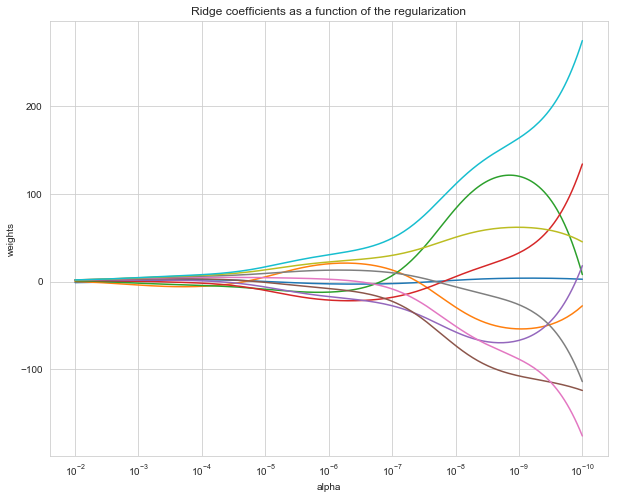

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############
#Compute Paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
##############
#Display Results
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


### LASSO Regression

A linear model that estimates sparse coefficients.

Mathmatically, it consists of a linear model trained with $\ell_1$ prior as a regularizer. The objective function to minimize is:
$$\min_w\frac{1}{2n_{samples}}||X_w-y||_2^2+\alpha||w||_2^2$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha||w||_1$ added, where $\alpha$ is a constanct and $||w||_1$ is the $\ell_1-\textit{norm}$ of the parameter vector.

### Elastic Net

A linear regression model trained with L1 and L2 prior as regularizer.

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasst and Ridge is that it allows Elastic-Net to inherit some of Ridge's stability under rotation.

The objective function to minimize in this case:
$$\min_w\frac{1}{2n_{samples}}||X_w-y||_2^2+\alpha\rho||w||_1+\frac{\alpha(1-\rho)}{2}||w||_2^2$$

***
### Outliers Impact

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

#### Linear Regression

In [158]:
from sklearn.linear_model import LinearRegression

Coefficient Estimate:  [0.47134857]


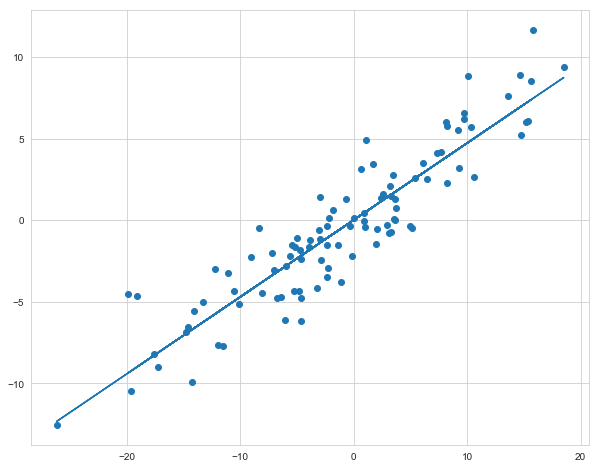

In [167]:
np.random.seed(42)
n_samples = 100
lr = LinearRegression()
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1, 1))
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient Estimate: ", lr.coef_)

In [170]:
# create a large outlier
idx = rng.argmax()
y_gen[idx] = 200

Coefficient Estimate:  [0.92796845]


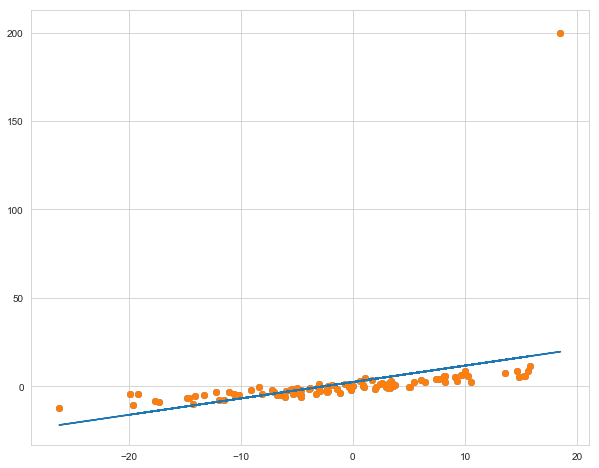

In [175]:
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);

o_lr = LinearRegression(normalize=True)
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1, 1))

plt.scatter(rng, y_gen);
plt.plot(rng, o_model_pred);
print("Coefficient Estimate: ", o_lr.coef_)

#### Ridge Regression

In [173]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [0.46398423]


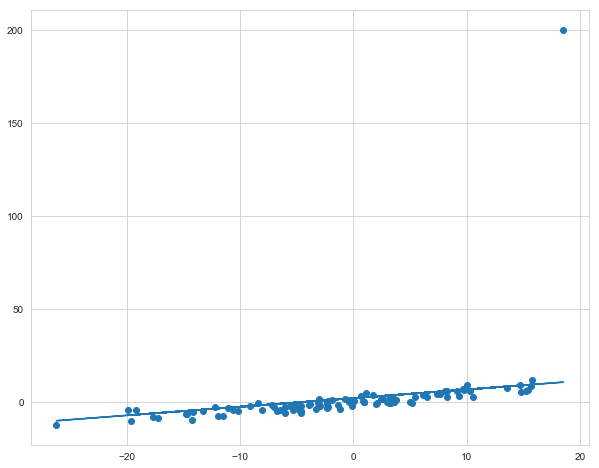

In [181]:
ridge_mod = Ridge(alpha=1, normalize=True)
ridge_mod.fit(rng.reshape(-1,1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred);
print("Coefficient Estimate: ", ridge_mod.coef_)

#### Lasso Regression

In [179]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [0.48530263]


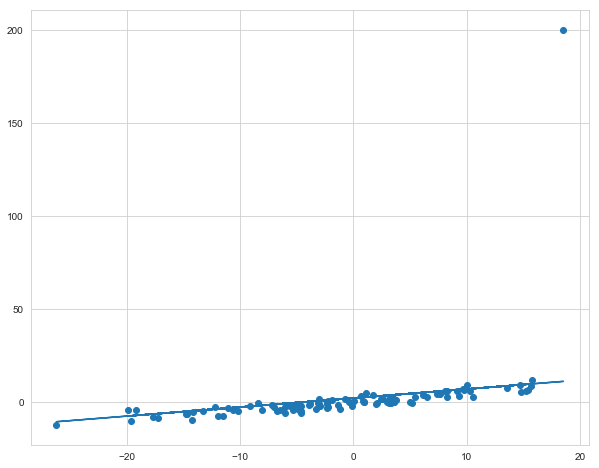

In [185]:
lasso_mod = Lasso(alpha=0.4, normalize=True)
lasso_mod.fit(rng.reshape(-1,1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred);
print("Coefficient Estimate: ", lasso_mod.coef_)

#### Elastic Net Regression

In [182]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [0.4584509]


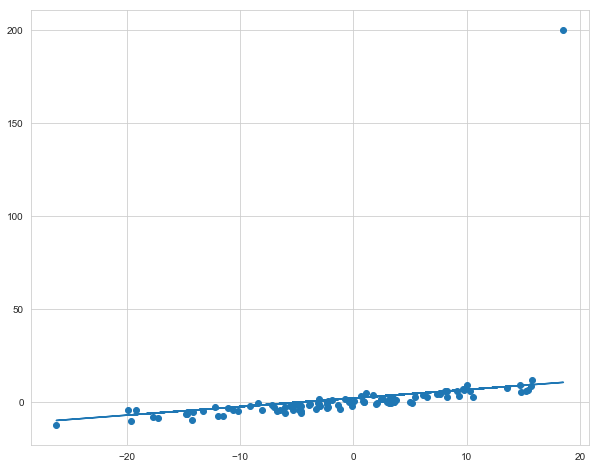

In [184]:
en_mod = ElasticNet(alpha=0.02, normalize=True)
en_mod.fit(rng.reshape(-1, 1), y_gen)
en_model_pred = en_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(10, 8));
plt.scatter(rng, y_gen);
plt.plot(rng, en_model_pred);
print("Coefficient Estimate: ", en_mod.coef_)

### Summary

When to use Ridge, Lasso, or Elastic Net:

 - Ridge regression can't zero out coefficients; You either end up including all or none in the model.
 - LASST does botyh parameter shrinkage and variable selection automatically.
 - If some of your covariates are highly correlated, may want to look at Elastic Net instead of LASSO.